### <font color = blue> Task 2:THE SPARKS FOUNDATION May'21 </font>

### Prediction Using Unsupervised ML

#### Task Description:

This is a **Clustering** Problem where we have to predict the optimum number of clusters in the Iris dataset.

<font color=red> The Iris dataset can be access from the given link</font> https://bit.ly/3kXTdox

#### Objective:

We have to represent the formed clusters with the help of **Visualisation**

#### <font color=green> **DONE BY- ZUBAIR SHEIKH** </font>

**The Steps we will cover in this task as follows:**
   1. Reading and Understanding the data
   2. Data Cleaning
   3. Data Visualisation for Insights
   4. Prepare data for modelling
   5. Model Building
   6. Final analysis and business recommendation

**THe Dataset Contains Following Variables:**
   - **ID** - unique ID for each Iris
   - **Sepal Length** - Length of sepals (in cm)
   - **Sepal Width** - Width of sepals (in cm)
   - **Petal Length** - Length of petals (in cm)
   - **Petal width** - Width of Petals (in cm)
   - **Species** - species available 

### <font color=blue> 1.Reading and Understanding the Data </font>

**Importing Warnings & important Libraries to read Iris dataset.**

In [1]:
### Import Warnings !!

import warnings
warnings.filterwarnings('ignore')

In [2]:
### Importing Important Libraries

import numpy as np
import pandas as pd

In [3]:
### Reading Dataset

iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
### Checking Shape

iris.shape

(150, 6)

In [5]:
### Checking data information

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
### Checking Summary of numeric columns

iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**NOTE:** <font color=red> Dataset contains some outliers </font>

### <font color=blue> 2.Data Cleaning </font>

In [7]:
### Checking Missing Values

iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**NOTE:** <font color=red> No Missing Values Present in the dataset

#### Dropping Reduntant Columns

In [8]:
### dropping Id columns which is useless for our analysis

iris = iris.drop('Id', axis=1)

In [9]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### <font color=blue> 3.Data Visualisation </font>

In [10]:
### Importing Imprtant Libraries

import matplotlib.pyplot as plt
import seaborn as sns

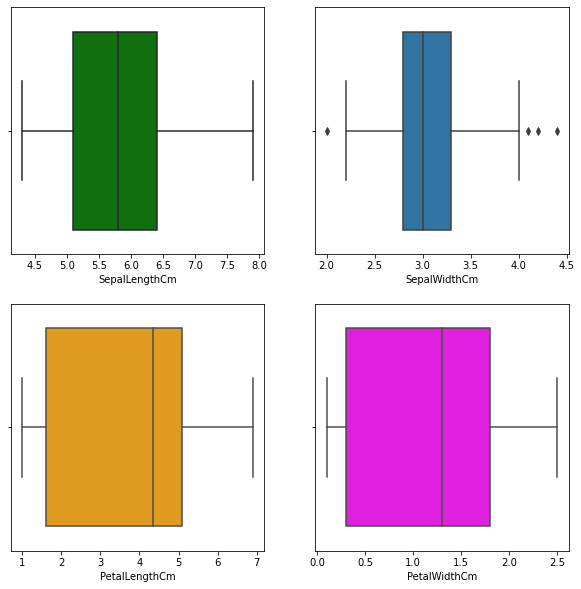

In [11]:
### Visualising Boxplot

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.boxplot(iris['SepalLengthCm'],color='green')

plt.subplot(2,2,2)
sns.boxplot(iris['SepalWidthCm'])

plt.subplot(2,2,3)
sns.boxplot(iris['PetalLengthCm'], color='orange')

plt.subplot(2,2,4)
sns.boxplot(iris['PetalWidthCm'], color='magenta')

plt.show();

**NOTE:** From above plot, we can conclude that **sepal width** variable has some outliers.

### <font color=blue> 4.Data preparation for modelling </font>

#### Outliers Treatment

In [12]:
### Checking Outliers 

Q1 = iris.quantile(0.25)
Q3 = iris.quantile(0.75)
IQR = Q3-Q1
print(IQR)

SepalLengthCm    1.3
SepalWidthCm     0.5
PetalLengthCm    3.5
PetalWidthCm     1.5
dtype: float64


In [13]:
### removing outliers

iris = iris[~((iris < (Q1 - 1.5 * IQR)) |(iris > (Q3 + 1.5 * IQR))).any(axis=1)]

<AxesSubplot:xlabel='SepalWidthCm'>

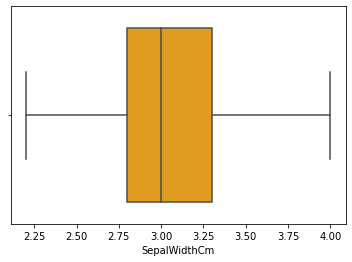

In [14]:
### Checking Sepal width variable

sns.boxplot(iris['SepalWidthCm'], color='orange')

#### <font color=red> **Outliers Present in the sepal width variable removed successfully !!!**</font>

#### Rescaling the Variables: 

Scaling all the numeric variables to same scale for easy interpretability of data 

In [15]:
### Import Important Libraries

import sklearn
from sklearn.preprocessing import StandardScaler

STORING SCALED VARIABLE IN NEW DATAFRAME i.e: **iris_df**

In [16]:
### Scaling the iris variables

iris_df = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

scaler = StandardScaler()

iris_df = scaler.fit_transform(iris_df)

<font color=green> **All numeric Variables are scaled to same scale** </font>

#### Hopkin's Statistics

In [17]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [18]:
### Converting the numpy again in dataframe

iris_df = pd.DataFrame(iris_df)
iris_df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']

In [19]:
### Checking hopkin's Value

hopkins(iris_df)

0.8685136953681615

**From above hopkins value, cluster tendency of data is quite good**

### <font color=blue> 5.Model Building </font>

In [20]:
### Reviewing Dataset

iris_df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,-0.910515,1.175789,-1.374878,-1.345899
1,-1.151122,-0.093924,-1.374878,-1.345899
2,-1.391729,0.413961,-1.431986,-1.345899
3,-1.512032,0.160019,-1.317771,-1.345899
4,-1.030819,1.429732,-1.374878,-1.345899


In [21]:
### Importing Kmeans libraries

from sklearn.cluster import KMeans

In [22]:
### Kmeans with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(iris_df)

KMeans(max_iter=50, n_clusters=4)

In [23]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 2, 3, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 3, 3, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3, 3, 1,
       3, 3, 3, 1, 1, 1, 3, 1, 2, 1, 2, 1, 2, 2, 3, 2, 1, 2, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 3, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

#### Finding the optimal elbows curve:

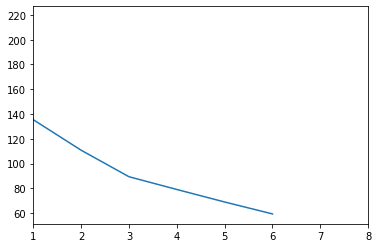

In [24]:
### Elbow Curve


x = iris_df.iloc[:, [0, 1, 2, 3]].values
ssd=[]
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(iris_df)
    
    ssd.append(kmeans.inertia_)
    
## Plot for ssdS
plt.xlim(1,8)
plt.plot(ssd);

#### <font color=green> **From above elbows curve, we can decide the optimum number of clusters easily** </font>

#### <font color=red> **Number of clusters = 3** </font>

#### Silhouette Analysis :

- The value of the silhouette score range between -1 to 1
- A score closer to 1 indicates that the data point is very similar to other data points in the cluster
- A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [25]:
### Importing Libraries from silhouette analysis

from sklearn.metrics import silhouette_score

In [26]:
### Checking for silhouette score

range_n_clusters = [2,3,4,5]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(iris_df)
    
    cluster_labels = kmeans.labels_
    
    ### Silhoeutte Score
    silhouette_avg = silhouette_score(iris_df,cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5802862813877144
For n_clusters=3, the silhouette score is 0.46634515335503746
For n_clusters=4, the silhouette score is 0.418104454735271
For n_clusters=5, the silhouette score is 0.35839535761633834


**So finally, for cluster=3 we are getting good silhouette score and we will move ahead !!!**

In [27]:
### Final model with k =3

kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(iris_df)


KMeans(max_iter=50, n_clusters=3)

In [28]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 50, n_init = 1,verbose=0, random_state = 3000)
final_cluster = kmeans.fit_predict(x)

In [29]:
iris['cluster_label'] = kmeans.labels_

In [30]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster_label
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


In [31]:
print('Model Building Complete !!!')

Model Building Complete !!!


### <font color=blue> 6. Final Analysis and Business Recommendation </font>

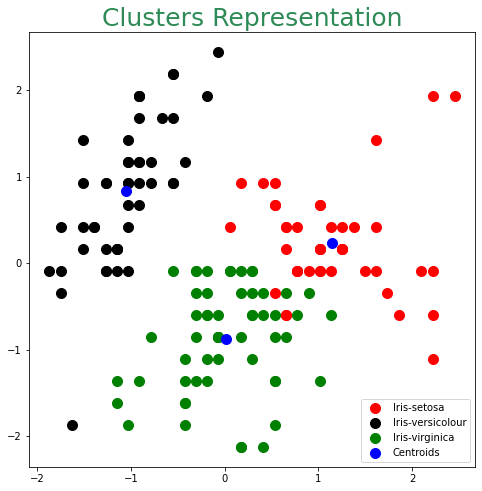

In [32]:
### Visualising the Clusters formed

plt.figure(figsize=(8,8))
plt.title('Clusters Representation', color='seagreen', fontsize=25)

plt.scatter(x[final_cluster == 0, 0], x[final_cluster == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[final_cluster == 1, 0], x[final_cluster == 1, 1], s = 100, c = 'black', label = 'Iris-versicolour')
plt.scatter(x[final_cluster == 2, 0],x[final_cluster == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'blue', label = 'Centroids')

plt.legend()
plt.show();

**Optimum Number of Cluster is 3 which shows good cluster tendency**

In [33]:
project_name = 'Iris Clusters_Prediction'

In [34]:
import jovian

In [35]:
jovian.commit(project_name, Environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "zubairsheikh9/iris-clusters-prediction" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/zubairsheikh9/iris-clusters-prediction


'https://jovian.ai/zubairsheikh9/iris-clusters-prediction'